# Colorthief explore

## Set-up

In [1]:
try:
    # If we are not on google colab we need to upgrade pandas...
    from google.colab import widgets
    !pip install colorthief
except ModuleNotFoundError:
    # If we are not on google colab we pass
    pass

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from colorthief import ColorThief
from PIL import Image
import requests
from io import BytesIO

%matplotlib inline

In [3]:
# taken from http://gvallver.perso.univ-pau.fr/?p=712
def show_colors(colors):
    """
    Draw a square for each color contained in the colors list
    given in argument.
    """
    with plt.rc_context(plt.rcParamsDefault):
        fig = plt.figure(figsize=(6, 1), frameon=False)
        ax = fig.add_subplot(111)
        for x, color in enumerate(colors):
            ax.add_patch(
                mpl.patches.Rectangle(
                    (x, 0), 1, 1, facecolor=color
                )
            )
        ax.set_xlim((0, len(colors)))
        ax.set_ylim((0, 1))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal")

    return fig

## Simple exploration


Let's see what we can do by looking at the image associated with each product. Here is the image (from product chosen out of random) that we are going to analyse: 

![Image OFF](https://static.openfoodfacts.org/images/products/356/007/061/7593/front_fr.7.400.jpg)

From that image we can simply extract its dominant colours using `colorthief`. 

In [4]:
response = requests.get(
    'https://static.openfoodfacts.org/images/products/356/007/061/7593/front_fr.7.400.jpg')
img = BytesIO(response.content)
color_thief = ColorThief(img)
dominant_color = color_thief.get_palette(quality=10)

Below is the dominant colour palette computed by `colorThief`, and the result is pretty good.

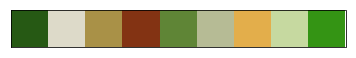

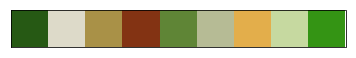

In [5]:
colors = [mpl.colors.to_hex([val/255 for val in col])
          for col in dominant_color]
show_colors(colors)

This is a new dimension we add to the project, and it's the dimension we plan on focusing on.